In [10]:
#
# conda install -c anaconda keras
# conda install -c anaconda numpy
# pip3 install python-mnist
#
import os
import gzip
import numpy as np
import keras
from keras.layers import Conv2D, MaxPool2D, Flatten
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

# Import Fashion MNIST
fashion_mnist = input_data.read_data_sets('input/data', one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting input/data\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting input/data\train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting input/data\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting input/data\t10k-labels-idx1-ubyte.gz


In [2]:
def load_mnist(path, kind='train'):
    '''

    Load MNIST data from `path`:

    - https://github.com/zalandoresearch/fashion-mnist/blob/master/utils/mnist_reader.py

    '''
    labels_path = os.path.join(
        path,
        '{}-labels-idx1-ubyte.gz'.format(kind)
    )
    images_path = os.path.join(
        path,
        '{}-images-idx3-ubyte.gz'.format(kind)


    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(
            lbpath.read(),
            dtype=np.uint8,
            offset=8
        )

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(
            imgpath.read(),
            dtype=np.uint8,
            offset=16
        ).reshape(len(labels), 784)

    return images, labels

In [36]:
# import data
X_train, y_train = load_mnist('../data', kind='train')
X_test, y_test = load_mnist('../data', kind='t10k')

# Shapes of training set
print("Training set (images) shape: {shape}".format(shape=X_train.shape))
print("Training set (labels) shape: {shape}".format(shape=y_train.shape))

# Shapes of test set
print("Test set (images) shape: {shape}".format(shape=X_test.shape))
print("Test set (labels) shape: {shape}".format(shape=y_test.shape))

Training set (images) shape: (60000, 784)
Training set (labels) shape: (60000,)
Test set (images) shape: (10000, 784)
Test set (labels) shape: (10000,)


In [20]:
labels = {
 0: 't-shirt',
 1: 'trouser',
 2: 'pullover',
 3: 'dress',
 4: 'coat',
 5: 'sandal',
 6: 'shirt',
 7: 'sneaker',
 8: 'bag',
 9: 'ankle-boot'
}

y = 6 (shirt)


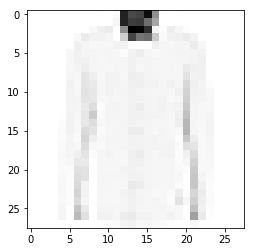

In [91]:
# exploratory #1
sample_1 = X_train[33].reshape(28,28)
sample_label_1 = y_train[33]

print('y = {index} ({label})'.format(
    index=sample_label_1,
    label=labels[sample_label_1])
)
plt.imshow(sample_1, cmap='Greys')

y = 4 (coat)


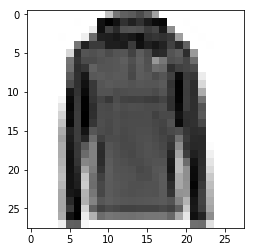

In [92]:
# exploratory #3
sample_2 = X_train[24].reshape(28,28)
sample_label_2 = y_train[24]

print('y = {index} ({label})'.format(
    index=sample_label_2,
    label=labels[sample_label_2])
)
plt.imshow(sample_2, cmap='Greys')